# Load Dataset

In [12]:
import pandas as pd
import os
import numpy as np
from pprint import pprint
from pathlib import Path
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def tryconvert(x, to_type, default):
  '''
  Try convert `x` to a type specified by `to_type` function. 
  Returns `default` value if casting is not possibile 
  '''
  try:
    return to_type(x)
  except:
    return default

def load_data(directory, nrows=None, usecols=None, converters=None, dtype=None):
# Read each CSV file in dir "path/to/root_dir"
    dfs = []
    for file in Path(directory).glob('**/*.csv'):
        dfs.append(pd.read_csv(file, nrows=nrows, usecols=usecols, converters=converters, dtype=dtype))
    # Put the dataframes to a single dataframe
    df = pd.concat(dfs, ignore_index=True)
    return df

malware_dir = os.path.join(os.getcwd(), 'dataset', 'Malware')

usecols = [" Total Length of Bwd Packets", " Fwd Packet Length Std", " Bwd Packet Length Min", " Bwd Packet Length Std", " Flow IAT Mean", " Flow IAT Min", "Init_Win_bytes_forward", " Init_Win_bytes_backward", " min_seg_size_forward", " Label"]

# Define column datatype when reading CSVs
converters = dict(itertools.product(usecols, [lambda x: tryconvert(x, float, np.nan)]))
converters[" Label"] = lambda x: x

# Load dataset
N_rows = 10
df = load_data(malware_dir, nrows=N_rows, usecols=usecols, converters=converters)

# shuffle dataset
# df = df.sample(frac=1).reset_index(drop=True)

# trim columns labels
df.columns = df.columns.str.strip()

# Drop rows which contain NaN values
df.dropna(inplace=True)

# Drop "MALWARE" or NaN rows
df.drop(df[(df["Label"] == "") | (df['Label'] == "MALWARE") | (df["Label"] == "BENIGN")].index, inplace = True)

df["Label"] = df["Label"].apply(lambda x: x.split("_")[0])
df

,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Min,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Label
0,212.0,567.535315,0.0,122.398257,1.521164e+05,146.0,65535.0,107.0,32.0,SMSMALWARE
1,0.0,29.698485,0.0,0.000000,4.000000e+01,40.0,121.0,-1.0,32.0,SMSMALWARE
2,0.0,24.248711,0.0,0.000000,3.505000e+02,317.0,7651.0,-1.0,32.0,SMSMALWARE
3,212.0,567.535315,0.0,122.398257,1.633322e+05,45.0,65535.0,107.0,32.0,SMSMALWARE
4,0.0,16.263456,0.0,0.000000,2.500000e+01,25.0,1419.0,-1.0,32.0,SMSMALWARE
...,...,...,...,...,...,...,...,...,...,...
4255,0.0,17.897858,0.0,0.000000,1.728700e+04,146.0,1595.0,-1.0,32.0,ADWARE
4256,13133.0,189.560688,0.0,628.615032,3.305852e+04,6.0,65535.0,257.0,32.0,ADWARE
4257,0.0,0.000000,0.0,0.000000,8.380200e+03,13.0,1641.0,-1.0,32.0,ADWARE
4258,0.0,0.000000,0.0,0.000000,2.248000e+04,22480.0,1635.0,1613.0,32.0,ADWARE


In [14]:
df.shape

(4250, 10)

In [15]:
df["Label"].unique()

array(['SMSMALWARE', 'RANSOMWARE', 'SCAREWARE', 'ADWARE'], dtype=object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4250 entries, 0 to 4259
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total Length of Bwd Packets  4250 non-null   float64
 1   Fwd Packet Length Std        4250 non-null   float64
 2   Bwd Packet Length Min        4250 non-null   float64
 3   Bwd Packet Length Std        4250 non-null   float64
 4   Flow IAT Mean                4250 non-null   float64
 5   Flow IAT Min                 4250 non-null   float64
 6   Init_Win_bytes_forward       4250 non-null   float64
 7   Init_Win_bytes_backward      4250 non-null   float64
 8   min_seg_size_forward         4250 non-null   float64
 9   Label                        4250 non-null   object 
dtypes: float64(9), object(1)
memory usage: 365.2+ KB


In [17]:
df.describe()

,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Min,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward
count,4.250000e+03,4250.000000,4250.000000,4250.000000,4.250000e+03,4.250000e+03,4250.000000,4250.000000,4250.000000
mean,2.700928e+04,53.829941,1.288706,69.692842,4.883337e+05,2.545850e+05,14343.720706,1101.544000,30.616471
std,4.796449e+05,118.539414,21.110044,179.981474,2.256508e+06,1.786069e+06,25653.240875,4868.479969,3.832970
min,0.000000e+00,0.000000,0.000000,0.000000,3.000000e+00,-2.000000e+00,0.000000,-1.000000,20.000000
25%,0.000000e+00,0.000000,0.000000,0.000000,6.220446e+03,3.700000e+01,1400.250000,-1.000000,32.000000
50%,0.000000e+00,0.000000,0.000000,0.000000,3.636550e+04,7.055000e+02,1593.000000,179.000000,32.000000
75%,0.000000e+00,29.698485,0.000000,0.000000,5.208867e+04,3.703500e+04,2813.000000,383.000000,32.000000
max,2.864423e+07,773.250498,773.000000,938.039292,3.817054e+07,3.335190e+07,65535.000000,65535.000000,32.000000


<Axes: xlabel='Label', ylabel='# occurrences'>

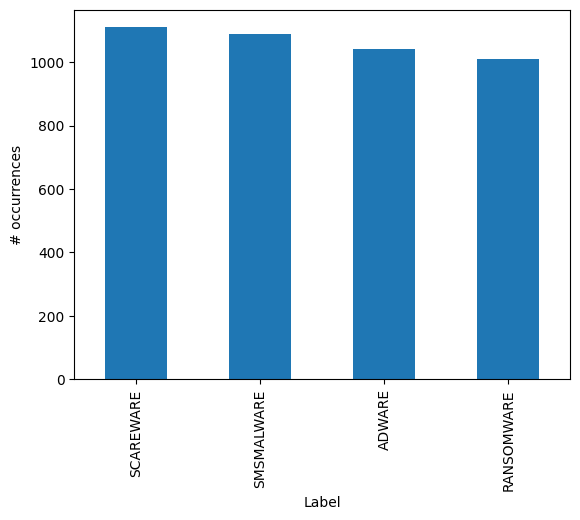

In [18]:
df["Label"].value_counts().plot(
    kind="bar",
    xlabel="Label",
    ylabel="# occurrences"
)

<Axes: ylabel='Label'>

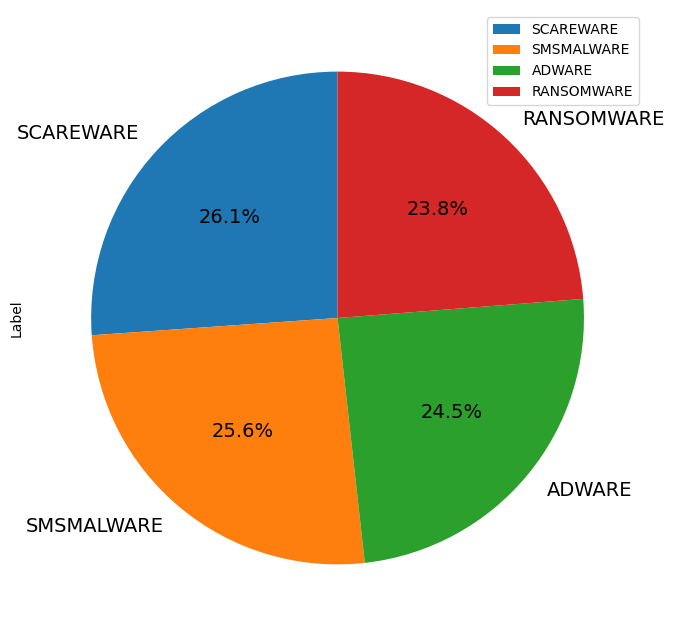

In [19]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

df["Label"].value_counts().plot(
    kind="pie",
    ax=ax,
    autopct='%1.1f%%',
    startangle=90,
    shadow=False,
    legend = True,
    fontsize=14
)

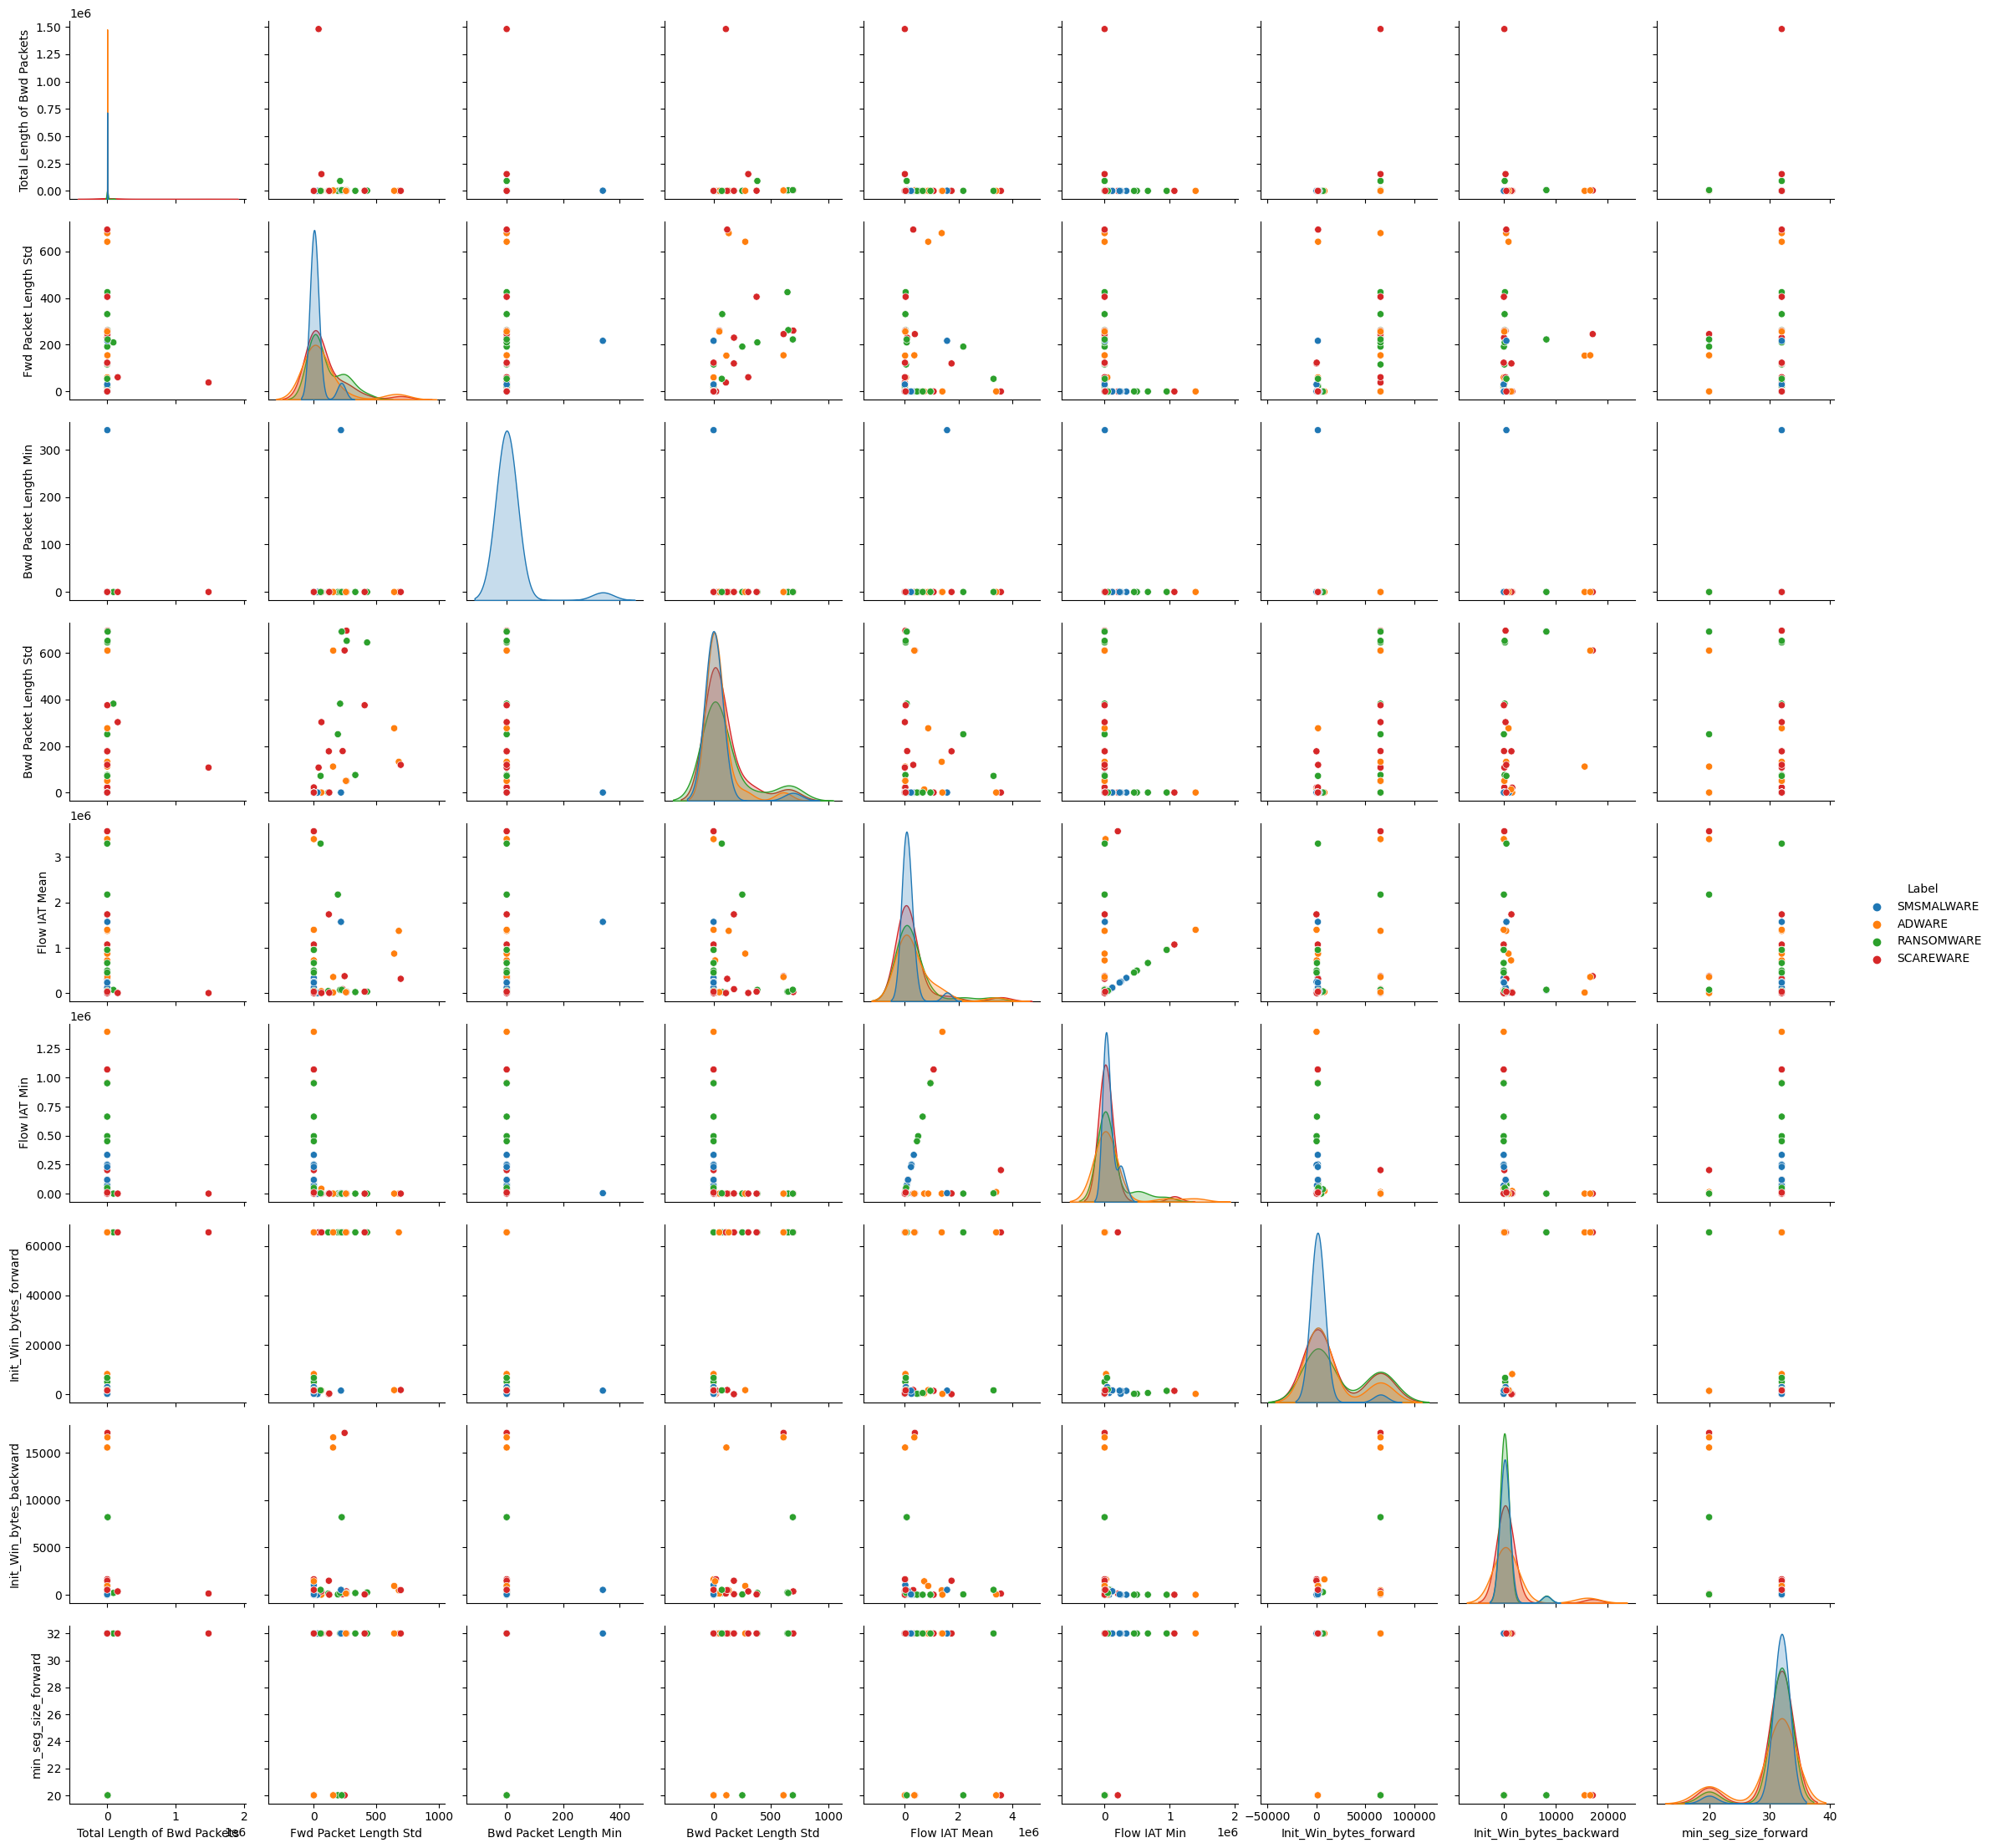

In [20]:
df = df.sample(frac=1).reset_index(drop=True)
sns.pairplot(df.iloc[:100], hue="Label")

# Data Preprocessing

In [21]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

def data_preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    if "Source IP" in df.columns:
        df['Source IP'] = label_encoder.fit_transform(df['Source IP'])
    if "Flow ID" in df.columns:
        df['Flow ID'] = label_encoder.fit_transform(df['Flow ID'])
    if "Destination IP" in df.columns:
        df['Destination IP'] = label_encoder.fit_transform(df['Destination IP'])

    if "Timestamp" in df.columns:
        # drop column Timestamp
        df = df.drop(['Timestamp'], axis=1)    
    return df

df = data_preprocessing(df)
df

,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Min,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Label
0,0.0,0.000000,0.0,0.000000,3.889100e+04,38891.0,2078.0,383.0,32.0,SMSMALWARE
1,0.0,0.000000,0.0,0.000000,3.728000e+04,37280.0,1903.0,377.0,32.0,ADWARE
2,0.0,0.000000,0.0,0.000000,2.230700e+04,22307.0,1593.0,349.0,32.0,ADWARE
3,201.0,260.483717,0.0,50.078985,2.166292e+04,14.0,65535.0,122.0,32.0,RANSOMWARE
4,7020.0,222.857204,0.0,692.669096,6.064000e+04,11.0,65535.0,8190.0,20.0,SMSMALWARE
...,...,...,...,...,...,...,...,...,...,...
4245,0.0,0.000000,0.0,0.000000,1.233190e+05,3100.0,175.0,1594.0,32.0,RANSOMWARE
4246,0.0,0.000000,0.0,0.000000,1.540693e+07,15406928.0,1547.0,-1.0,32.0,SMSMALWARE
4247,0.0,0.000000,0.0,0.000000,3.004290e+05,300429.0,1386.0,235.0,32.0,SMSMALWARE
4248,0.0,0.000000,0.0,0.000000,2.151955e+06,2151955.0,65535.0,-1.0,20.0,SMSMALWARE


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Label'], axis=1),
    df['Label'],
    test_size=0.4,
    random_state=42
)

#p = 0.8
#train_df, test_df = df[:int(len(df)*p)], df[int(len(df)*p):]

X_train.shape, X_test.shape

((2550, 9), (1700, 9))

In [23]:
X_train.head()

,Total Length of Bwd Packets,Fwd Packet Length Std,Bwd Packet Length Min,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Min,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward
104,0.0,60.104076,0.0,0.0,3.317200e+04,33172.0,2093.0,-1.0,32.0
3787,0.0,0.000000,0.0,0.0,1.915900e+04,1688.0,1470.0,404.0,32.0
4164,160.0,98.802159,0.0,80.0,1.179687e+06,44.0,65535.0,59.0,32.0
3888,0.0,0.000000,0.0,0.0,3.640600e+04,36406.0,1486.0,404.0,32.0
2118,0.0,0.000000,0.0,0.0,2.263000e+04,22630.0,1546.0,340.0,32.0


In [24]:
y_train.head()

104        ADWARE
3787    SCAREWARE
4164       ADWARE
3888       ADWARE
2118       ADWARE
Name: Label, dtype: object

# Valutazione

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=classes,
        yticklabels=classes,
        title=title,
        ylabel='True label',
        xlabel='Predicted label'
    )
    plt.setp(
        ax.get_xticklabels(),
        rotation=45,
        ha='right',
        rotation_mode='anchor'
    )
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    return ax

def valuate(clf, x_test, y_test):
    y_pred = clf.predict(x_test)
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, classes=clf.classes_, title='Confusion matrix')


# Decision Tree

In [27]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)

[Text(0.5, 0.875, 'Init_Win_bytes_backward <= 256.5\ngini = 0.749\nsamples = 2550\nvalue = [620, 599, 681, 650]\nclass = SCAREWARE'),
 Text(0.25, 0.625, 'Init_Win_bytes_backward <= 164.5\ngini = 0.732\nsamples = 1424\nvalue = [263, 501, 277, 383]\nclass = RANSOMWARE'),
 Text(0.125, 0.375, 'Init_Win_bytes_forward <= 332.0\ngini = 0.748\nsamples = 1176\nvalue = [262, 310, 276, 328]\nclass = SMSMALWARE'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Init_Win_bytes_backward <= 175.5\ngini = 0.358\nsamples = 248\nvalue = [1, 191, 1, 55]\nclass = RANSOMWARE'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Init_Win_bytes_backward <= 511.5\ngini = 0.707\nsamples = 1126\nvalue = [357, 98, 404, 267]\nclass = SCAREWARE'),
 Text(0.625, 0.375, 'Flow IAT Mean <= 36022.5\ngini = 0.651\nsamples = 723\nvalue = [227, 4, 316, 176]\nclass = SCAREWARE'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6

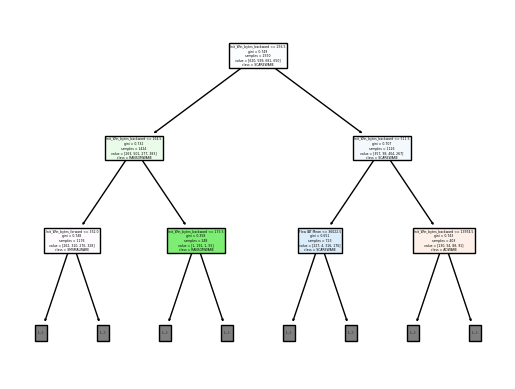

In [30]:
tree.plot_tree(decision_tree, filled=True, class_names=decision_tree.classes_, feature_names=X_train.columns, max_depth=2)

              precision    recall  f1-score   support

      ADWARE       0.54      0.49      0.51       420
  RANSOMWARE       0.64      0.65      0.64       411
   SCAREWARE       0.40      0.47      0.43       429
  SMSMALWARE       0.37      0.33      0.35       440

    accuracy                           0.48      1700
   macro avg       0.49      0.48      0.48      1700
weighted avg       0.48      0.48      0.48      1700



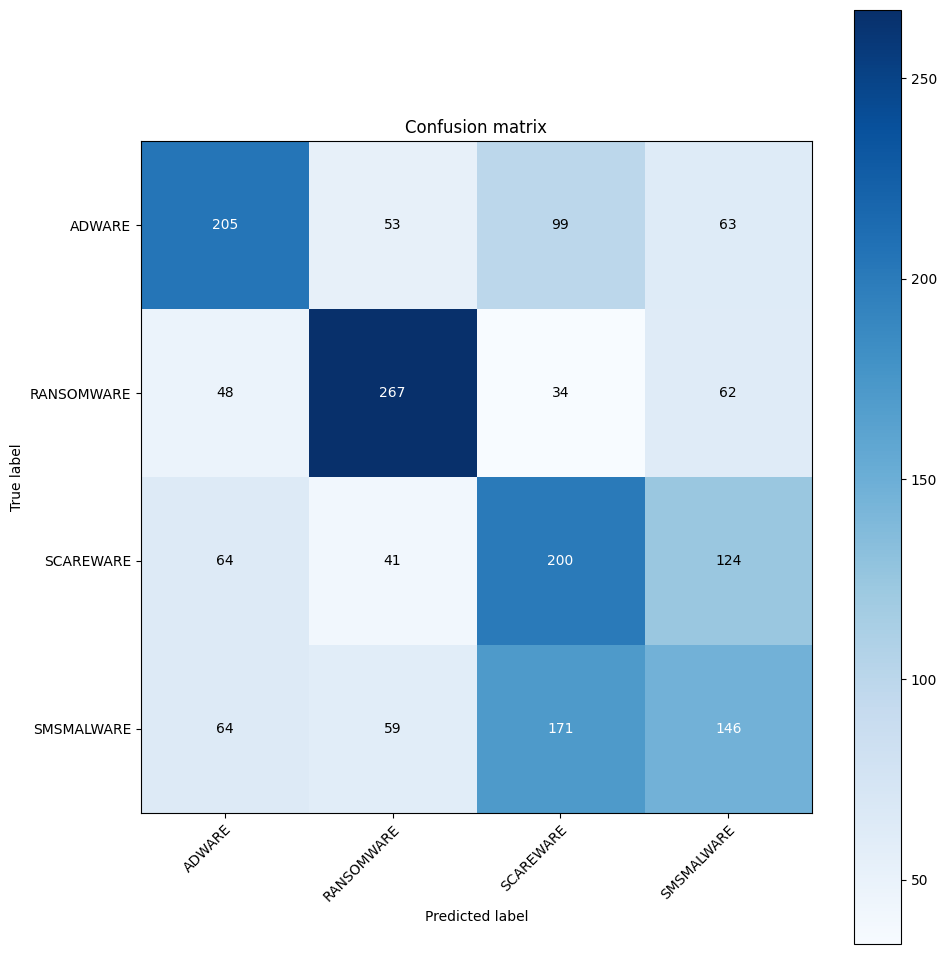

In [31]:
valuate(decision_tree, X_test, y_test)

In [32]:
from sklearn.model_selection import cross_validate

scores = cross_validate(
    decision_tree,
    X_train,
    y_train,
    cv=10,
    scoring=['accuracy', 'precision_macro', 'recall_macro']
)

In [33]:
print(f'{10}-fold cross validation:')
# print('Accuracy: %0.2f (+/- %0.2f)' % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
print('Precision: %0.2f (+/- %0.2f)' % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
print('Recall: %0.2f (+/- %0.2f)' % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))

10-fold cross validation:
Precision: 0.64 (+/- 0.00)
Recall: 0.64 (+/- 0.00)


# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

N = 100
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train[:N], y_train[:N])

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

      ADWARE       0.32      0.44      0.37       420
  RANSOMWARE       0.27      0.31      0.29       411
   SCAREWARE       0.27      0.23      0.25       429
  SMSMALWARE       0.24      0.16      0.19       440

    accuracy                           0.28      1700
   macro avg       0.28      0.28      0.27      1700
weighted avg       0.28      0.28      0.27      1700



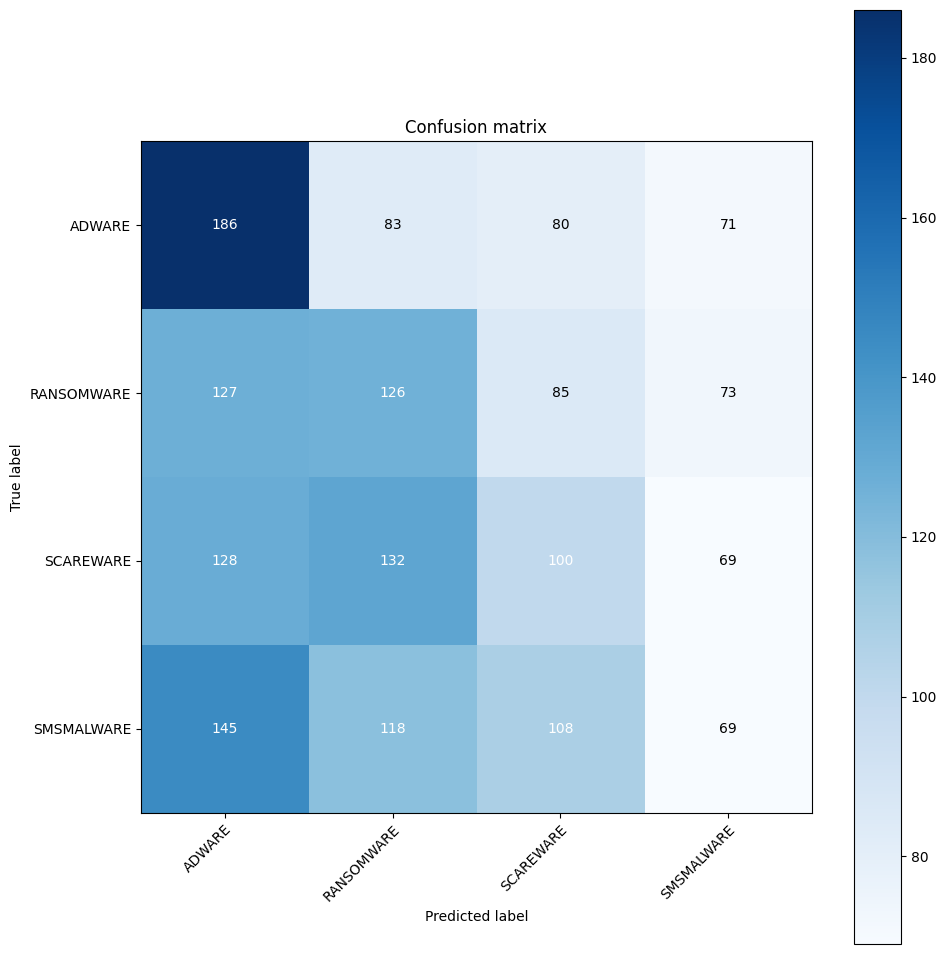

In [33]:
valuate(knn, X_test, y_test)

# Support Vector Machine

In [34]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

C=1.0
models = (
    # svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=1000, dual=True),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    #svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = [clf.fit(X_train[:5_000], y_train[:5_000]) for clf in models]

/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC:
              precision    recall  f1-score   support

      ADWARE       0.00      0.00      0.00       420
  RANSOMWARE       0.25      0.27      0.26       411
   SCAREWARE       1.00      0.00      0.00       429
  SMSMALWARE       0.26      0.74      0.38       440

    accuracy                           0.26      1700
   macro avg       0.38      0.25      0.16      1700
weighted avg       0.38      0.26      0.16      1700

SVC:
              precision    recall  f1-score   support

      ADWARE       0.68      0.03      0.06       420
  RANSOMWARE       0.94      0.04      0.08       411
   SCAREWARE       0.24      0.84      0.37       429
  SMSMALWARE       0.46      0.15      0.22       440

    accuracy                           0.27      1700
   macro avg       0.58      0.27      0.18      1700
weighted avg       0.58      0.27      0.19      1700



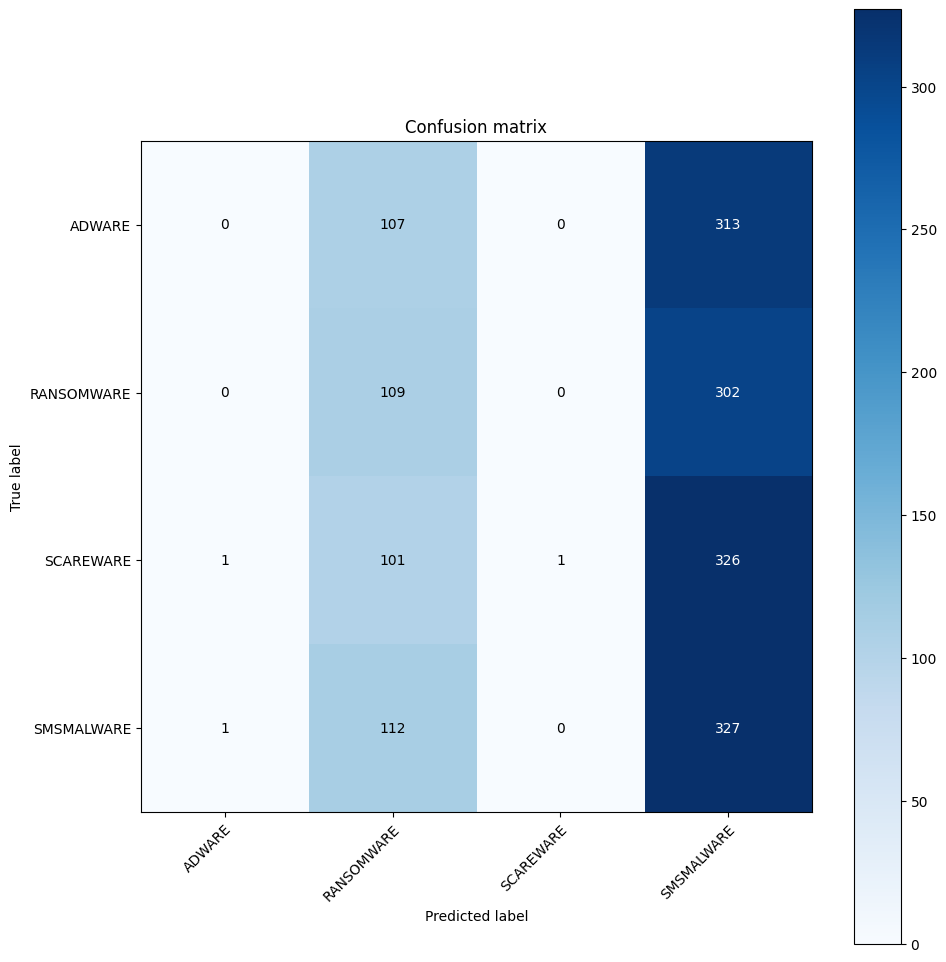

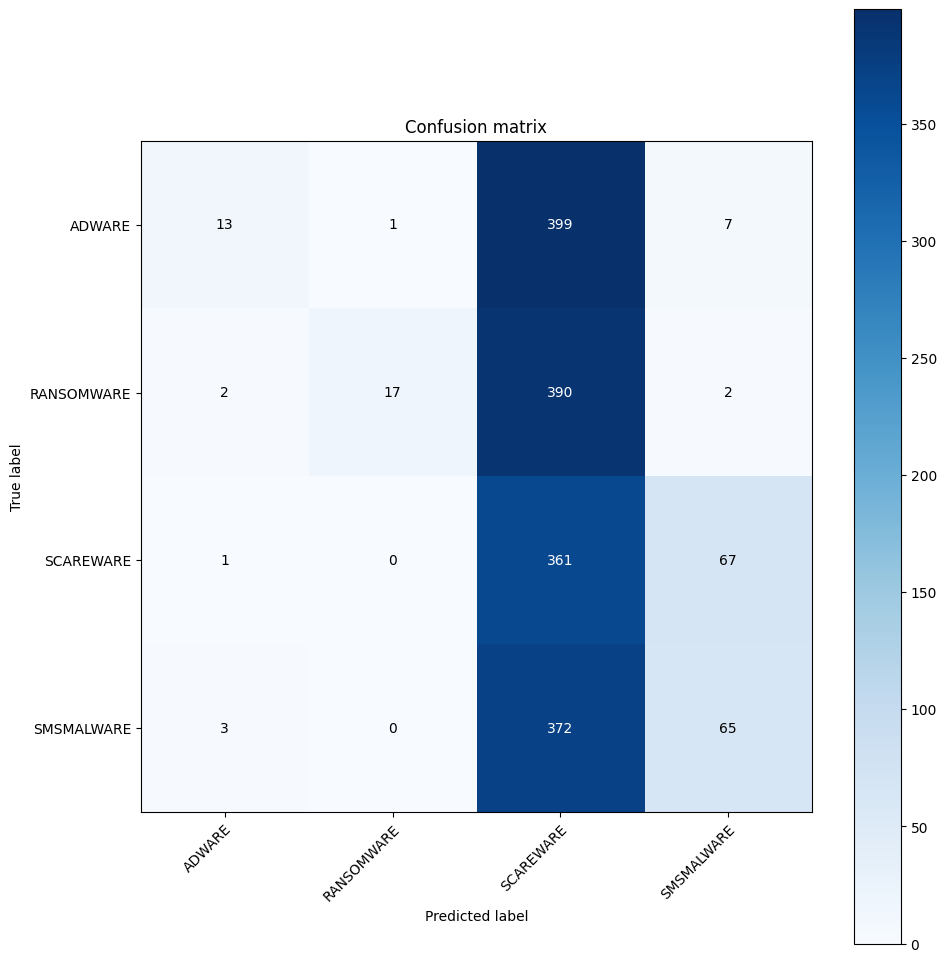

In [35]:
# valuate models

for clf in models:
    # print scores 
    print(f'{clf.__class__.__name__}:')
    valuate(clf, X_test[:4_000], y_test[:4_000])

# Softmax Regression

In [36]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

              precision    recall  f1-score   support

      ADWARE       0.26      0.48      0.34       420
  RANSOMWARE       0.32      0.16      0.22       411
   SCAREWARE       0.25      0.41      0.31       429
  SMSMALWARE       0.32      0.01      0.03       440

    accuracy                           0.26      1700
   macro avg       0.29      0.26      0.22      1700
weighted avg       0.29      0.26      0.22      1700



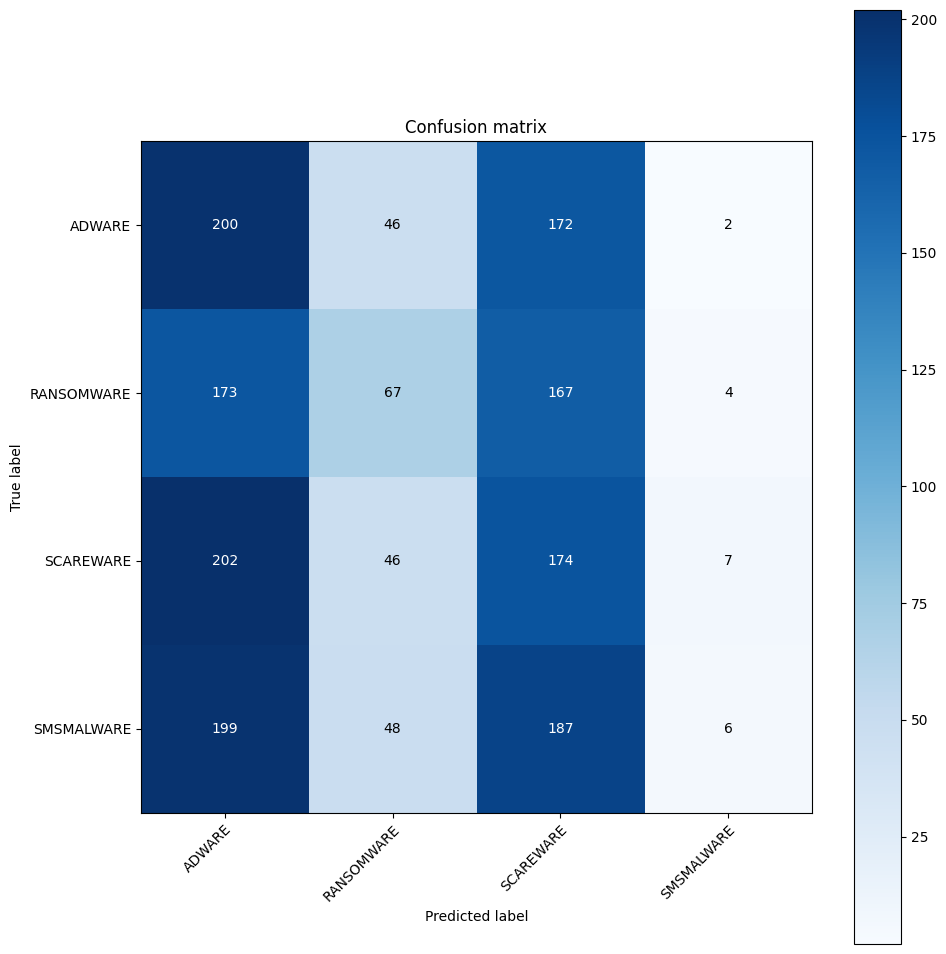

In [37]:
valuate(logistic_classifier, X_test, y_test)

# Gaussian Discriminant Analysis

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_classifier = LinearDiscriminantAnalysis().fit(X_train, y_train)

              precision    recall  f1-score   support

      ADWARE       0.42      0.20      0.27       420
  RANSOMWARE       0.45      0.05      0.08       411
   SCAREWARE       0.29      0.72      0.42       429
  SMSMALWARE       0.29      0.27      0.28       440

    accuracy                           0.31      1700
   macro avg       0.36      0.31      0.26      1700
weighted avg       0.36      0.31      0.26      1700



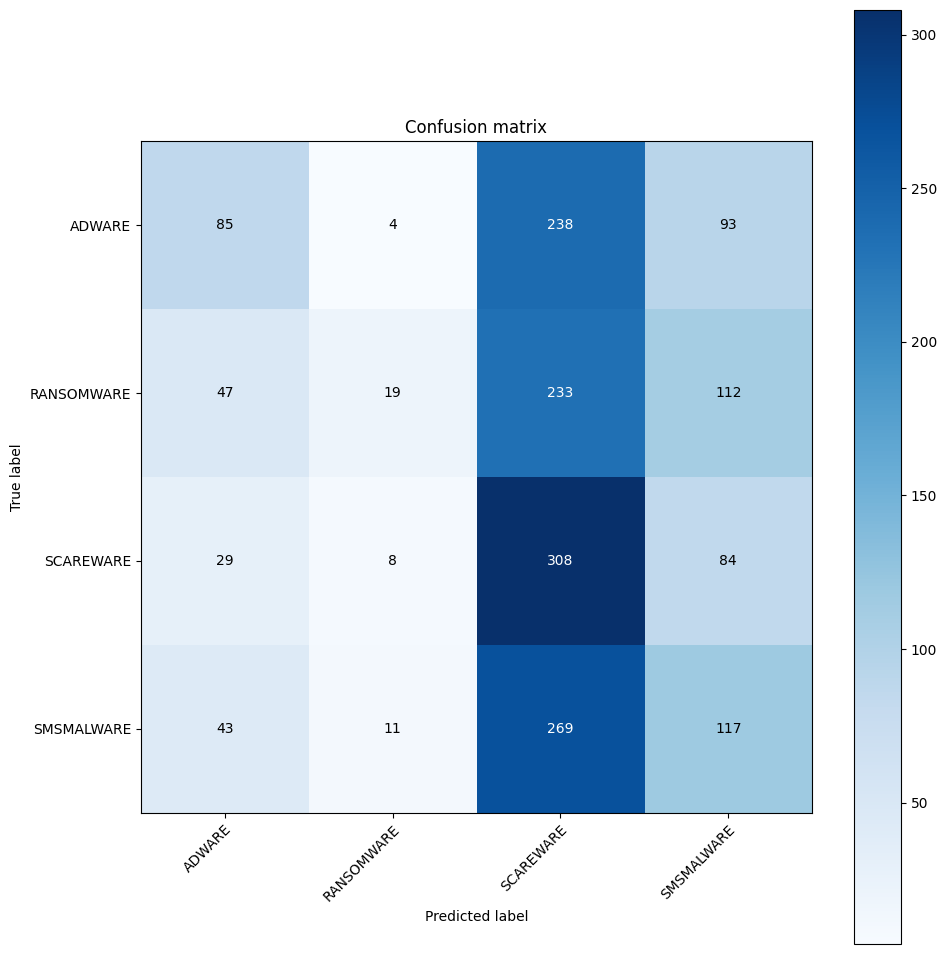

In [40]:
valuate(lda_classifier, X_test, y_test)

# MultiLayer Perceptron

In [46]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=32)
# X_train_reduced = pca.fit_transform(X_train)
# X_test_reduced = pca.transform(X_test)

In [42]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


In [55]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(y):
    y = y.values.reshape(-1, 1)
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(y)
    y = ohe.transform(y)
    return y


In [69]:
from torch import nn

class MultiClassNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(9, 16)
        self.act = nn.ReLU()
        self.output = nn.Linear(16, 4)

    def forward(self, x):
        x = self.act(self.hidden(x))
        x = self.output(x)
        return x
    
model = MultiClassNN()


In [60]:
X_train.values

array([[ 0.00000000e+00,  6.01040764e+01,  0.00000000e+00, ...,
         2.09300000e+03, -1.00000000e+00,  3.20000000e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.47000000e+03,  4.04000000e+02,  3.20000000e+01],
       [ 1.60000000e+02,  9.88021592e+01,  0.00000000e+00, ...,
         6.55350000e+04,  5.90000000e+01,  3.20000000e+01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.54800000e+03,  3.40000000e+02,  3.20000000e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.79000000e+02,  1.72700000e+03,  3.20000000e+01],
       [ 2.04000000e+02,  8.13928744e+01,  0.00000000e+00, ...,
         6.55350000e+04,  2.35000000e+02,  3.20000000e+01]])

In [61]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(one_hot_encoding(y_train), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(one_hot_encoding(y_test), dtype=torch.float32)

In [70]:
import copy
import tqdm
from torch import optim

# loss metric and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# prepare model and training parameters
n_epochs = 8
batch_size = 5
batches_per_epoch = len(X_train) // batch_size

best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

# training loop
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train_tensor[start:start+batch_size]
            y_batch = y_train_tensor[start:start+batch_size]

            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            
            # backward pass
            optimizer.zero_grad()
            loss.backward()

            # update weights
            optimizer.step()

            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )

    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test_tensor)
    ce = loss_fn(y_pred, y_test_tensor)
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test_tensor, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")

# Restore best model
model.load_state_dict(best_weights)

Epoch 0: 100%|██████████| 510/510 [00:08<00:00, 63.25batch/s, acc=0.4, loss=4.97e+3] 


Epoch 0 validation: Cross-entropy=4592.91, Accuracy=26.4%


Epoch 1: 100%|██████████| 510/510 [00:08<00:00, 61.21batch/s, acc=0.2, loss=3.8e+3]  


Epoch 1 validation: Cross-entropy=2208.84, Accuracy=28.5%


Epoch 2: 100%|██████████| 510/510 [00:08<00:00, 61.35batch/s, acc=0.2, loss=2.49e+3] 


Epoch 2 validation: Cross-entropy=1168.74, Accuracy=27.2%


Epoch 3: 100%|██████████| 510/510 [00:08<00:00, 60.22batch/s, acc=0.4, loss=701]    


Epoch 3 validation: Cross-entropy=1578.82, Accuracy=28.4%


Epoch 4: 100%|██████████| 510/510 [00:08<00:00, 62.30batch/s, acc=0, loss=6.88e+3]   


Epoch 4 validation: Cross-entropy=926.38, Accuracy=26.5%


Epoch 5: 100%|██████████| 510/510 [00:08<00:00, 62.61batch/s, acc=0, loss=4.37e+3]  


Epoch 5 validation: Cross-entropy=694.55, Accuracy=26.9%


Epoch 6: 100%|██████████| 510/510 [00:09<00:00, 54.29batch/s, acc=0.4, loss=5.37e+3]


Epoch 6 validation: Cross-entropy=2660.32, Accuracy=26.4%


Epoch 7: 100%|██████████| 510/510 [00:08<00:00, 59.57batch/s, acc=0.2, loss=1.49e+3]


Epoch 7 validation: Cross-entropy=620.97, Accuracy=28.1%


<All keys matched successfully>

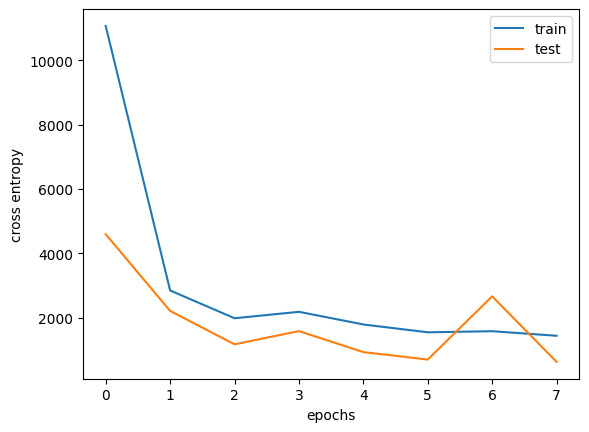

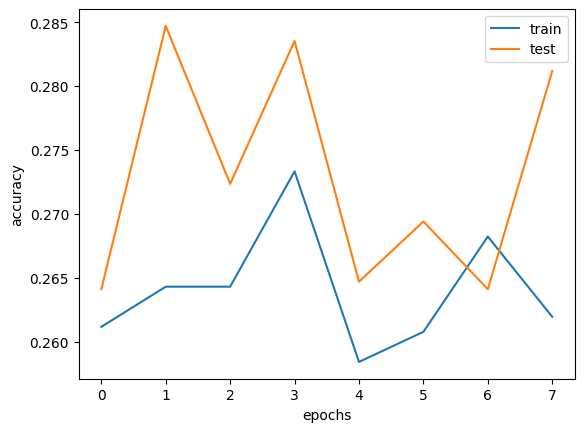

In [71]:

# Plot the loss and accuracy
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()